In [2]:
import matplotlib.pyplot as plt

In [3]:
import struct
import numpy as np
from functools import reduce
from operator  import mul

def show_image_from_file(filename, shape, size, ax=plt):
    data = read_raw(filename)
    image = wrap_1d_into_3d(data, shape)
    show_image(image, zslice=shape[-1]//2, extent=size, ax=ax)


def show_image(image, zslice, extent, ax=plt):
    xe, ye, ze = extent
    ax.imshow(image[:, :, zslice].transpose(),
              extent = [-xe,xe, -ye,ye],
              origin = 'lower')


def read_raw(filename):
    buffer = open(filename, 'rb').read()
    return struct.unpack_from('f' * (len(buffer) // 4), buffer)


def wrap_1d_into_3d(data, shape, row_major=False):
    assert len(data) == reduce(mul, shape)
    image = np.zeros(shape)
    nx, ny, nz = shape
    for index, x in enumerate(data):
        i = int(index % nx)
        j = int(index / nx) % ny
        k = int(index / (nx * ny))
        if row_major: image[k,j,i] = x
        else        : image[i,j,k] = x
    return image


def image_filename(path, shape, true_or_reco, tof, it):
    x, y, z  = shape
    return f'{path}/{x}_{y}_{z}_{true_or_reco}_tof_{tof}_{it:02}.raw'

Iteration: 0


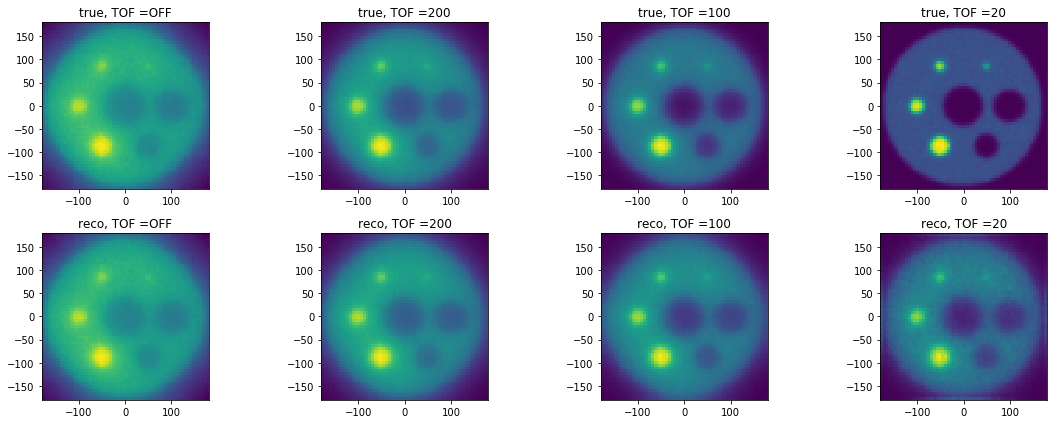

Iteration: 10


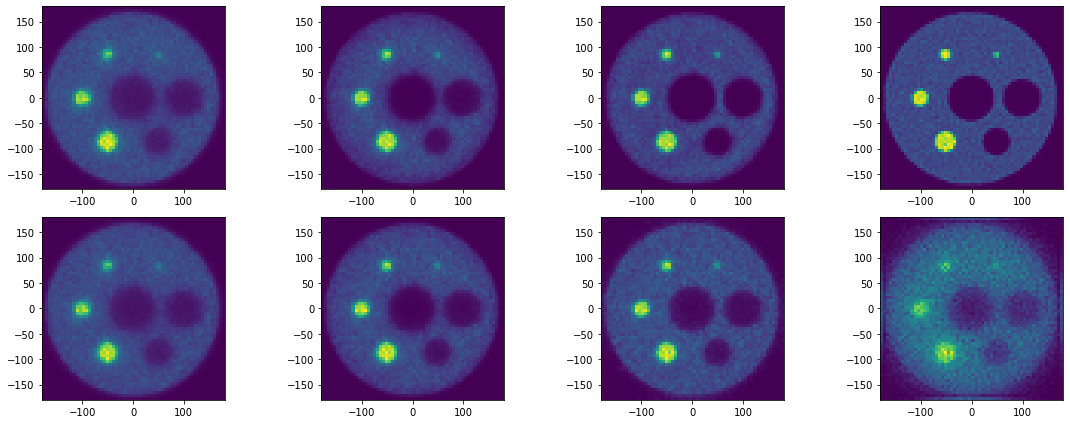

Iteration: 20


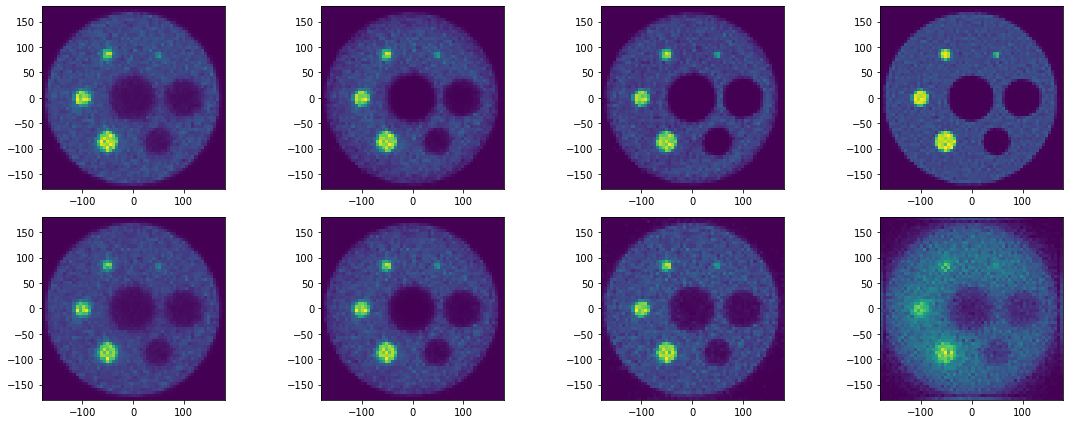

In [5]:
reco_prefix_base = '/Users/carmenromoluque/Desktop/images_rust'
kinds  = (('true', 'OFF'),
          ('true', 200),
          ('true', 100), 
          ('true', 20),
          ('reco', 'OFF'),
          ('reco', 200),
          ('reco', 100), 
          ('reco', 20))
shape  = (60, 60, 60)
tot_it = 30
size   = (180, 180, 180)

num_it = 5
for it in range(0, tot_it, 10):
    fig, axs = plt.subplots(2,4, figsize=(16, 6))
    print(f'Iteration: {it}')
    for ax, (true_or_reco, tof) in zip(axs.flatten(), kinds):
        base = f'{reco_prefix_base}/{true_or_reco}/'
        filename = image_filename(base, shape, true_or_reco, tof, it)
        show_image_from_file(filename, shape, size, ax)
        if it == 0:
            ax.set_title(f'{true_or_reco}, TOF ={tof}')
    plt.tight_layout()
    plt.show()